In [ ]:
!python -m spacy download es_core_news_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    # Convertir a string y reemplazar NaN con cadena vacía
    if not isinstance(texto, str):
        texto = str(texto)
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto = limpiar_texto(texto)
    sentiment_scores = analyzer.polarity_scores(texto)
    compound_score = sentiment_scores['compound']

    # Ponderación extra para palabras clave
    ponderacion_extra = 0
    palabras_clave = {
        'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
        'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
        'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
        'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
        'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
        'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
        'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
        'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
        'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
        'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
    }
    for palabra, peso in palabras_clave.items():
        if palabra in texto:
            ponderacion_extra += peso

    return compound_score + ponderacion_extra

# Asegurarse de que todos los valores en la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str)

# Aplicar la función al dataframe
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")


Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'


In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    # Comprobar si el valor es NaN o no es una cadena
    if not isinstance(texto, str):
        texto = ""  # Asignar cadena vacía si no es texto válido
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Diccionario de palabras clave con puntuaciones negativas
palabras_clave = {
    'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
    'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
    'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
    'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
    'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
    'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
    'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
    'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
    'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
    'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
}

# Función para traducir el tweet y calcular la puntuación usando TextBlob
def calcular_puntuacion_textblob(texto):
    texto = limpiar_texto(texto)
    try:
        blob = TextBlob(texto)
        # Traducir al inglés antes de hacer el análisis de sentimiento
        texto_traducido = blob.translate(to='en')
        sentiment = texto_traducido.sentiment.polarity
    except Exception as e:
        sentiment = 0  # En caso de error en la traducción o análisis

    return sentiment

# Aplicar la función al dataframe usando la columna 'Texto'
df['puntuacion_textblob'] = df['Texto'].apply(calcular_puntuacion_textblob)

df.to_csv('tweets_puntuados_textblob.csv', index=False)

print("Análisis de sentimiento completado con TextBlob.")

# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto_limpio = limpiar_texto(texto)
    sentiment_scores = analyzer.polarity_scores(texto_limpio)
    compound_score = sentiment_scores['compound']

    # Ponderación extra para palabras clave
    ponderacion_extra = 0

    for palabra, peso in palabras_clave.items():
        if palabra in texto_limpio:
            ponderacion_extra += peso

    # Sumar la ponderación extra al puntaje 'compound' de VADER
    puntuacion_total = compound_score + ponderacion_extra
    puntuacion_total = max(min(puntuacion_total, 1), -1)
    return puntuacion_total

# Aplicar la función al dataframe usando la columna 'Texto'
df['puntuacion_vader'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)

# Guardar el dataframe actualizado en un nuevo archivo CSV
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")


Análisis de sentimiento completado con TextBlob.
Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'


In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales.csv')

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Función para traducir el texto al inglés
def traducir_al_ingles(texto):
    try:
        blob = TextBlob(texto)
        texto_traducido = str(blob.translate(to='en'))  # Traducir a inglés
        return texto_traducido
    except Exception as e:
        return texto  # Si hay un error en la traducción, usar el texto original

# Función para calcular la puntuación de un tweet usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto = limpiar_texto(texto)

    # Traducir el texto al inglés antes de aplicar VADER
    texto_ingles = traducir_al_ingles(texto)

    # Análisis de sentimiento con VADER
    sentiment_scores = analyzer.polarity_scores(texto_ingles)
    compound_score = sentiment_scores['compound']

    # Ponderación extra para palabras clave en español
    ponderacion_extra = 0
    palabras_clave = {
        'lluvia': -1, 'nublado': -1, 'tormenta': -2, 'viento': -1, 'granizo': -2,  # Clima
        'accidente': -2, 'choque': -2, 'derrape': -2, 'atropello': -3,  # Accidentes vehiculares
        'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -2,  # Problemas de tráfico
        'inundación': -3, 'desborde': -3, 'charco': -1, 'encharcamiento': -2,  # Problemas por agua
        'apagón': -2, 'falla': -1, 'electricidad': -1, 'corte': -2, 'colapso': -3,  # Problemas eléctricos
        'evacuación': -3, 'rescate': -2, 'desalojo': -3,  # Emergencias
        'muertos': -4, 'heridos': -3, 'destrucción': -4, 'incendio': -3,  # Consecuencias graves
        'explosión': -4, 'caos': -2, 'derrumbes': -3, 'colapsos': -3,  # Otros desastres
        'afectados': -2, 'perdidas': -3, 'daños': -2, 'colisión': -2,  # Impactos generales
        'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -2,  # Daños materiales
    }

    # Añadir ponderación basada en palabras clave en español
    for palabra, peso in palabras_clave.items():
        if palabra in texto:
            ponderacion_extra += peso

    # Devolver la puntuación combinada
    return compound_score + ponderacion_extra

# Asegurarse de que la columna 'Texto' no tiene valores NaN y convertir todos los valores a cadenas
df['Texto'] = df['Texto'].fillna('').astype(str)

# Aplicar la función al dataframe
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)

print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")


Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar los recursos necesarios de nltk
nltk.download('vader_lexicon')

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Ruta del archivo proporcionado
data = pd.read_csv(file_path)

# Inicializar el analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

# Función para obtener la puntuación de sentimiento
def vader_sentiment_score(text):
    try:
        # Asegurarse de que el texto no sea NaN y esté en formato string
        if pd.isna(text):
            return 0  # Si el texto es NaN, devolver 0 como neutral
        sentiment = sia.polarity_scores(str(text))
        return sentiment['compound']  # 'compound' da una puntuación general de sentimiento
    except Exception as e:
        return 0  # En caso de error, devolver 0 como neutral

# Asegurarse de que la columna 'Texto' no tenga valores NaN y convertirlos en cadenas
if 'Texto' in data.columns:
    data['Texto'] = data['Texto'].fillna('').astype(str)

    # Aplicar la función a la columna 'Texto' y crear una nueva columna 'puntuación'
    data['puntuación'] = data['Texto'].apply(vader_sentiment_score)
else:
    print("Error: La columna 'Texto' no se encuentra en el dataset.")

# Guardar el dataset modificado en un nuevo archivo CSV en el directorio actual
output_path = 'Tweets_calificados_vader.csv'  # Ruta de salida del archivo
data.to_csv(output_path, index=False)

print(f"Análisis de sentimiento completado y guardado en '{output_path}'")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Análisis de sentimiento completado y guardado en 'Tweets_calificados_vader.csv'


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import pandas as pd

In [ ]:
# Cambia el modelo a uno adecuado para español
MODEL = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

# Cargar el archivo CSV
file_path = '/content/tweets_globales.csv'  # Cambiar la ruta al archivo CSV
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Función para calcular la puntuación de sentimiento
def calculate_sentiment(text):
    try:
        # Tokenización y conversión a tensores
        inputs = tokenizer(text, return_tensors="pt")

        # Desactivar la evaluación de gradiente para el cálculo de puntuaciones
        with torch.no_grad():
            outputs = model(**inputs)

        # Obtener las puntuaciones y aplicar softmax
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])

        # Calcular la puntuación de sentimiento usando las etiquetas
        sentiment_score = sum([a*b for a, b in zip(sentiment_labels, scores)])
        return sentiment_score
    except Exception as e:
        return 0  # En caso de error, devolver 0 como neutral

# Asegurarse de que la columna 'Texto' no tenga valores NaN y convertirlos en cadenas
df['Texto'] = df['Texto'].fillna('').astype(str)

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

In [ ]:
# Guardar el dataset modificado en un nuevo archivo CSV
output_path = 'Tweets_calificados_modelo1.csv'  # Reemplaza con la ruta correcta
df.to_csv(output_path, index=False)

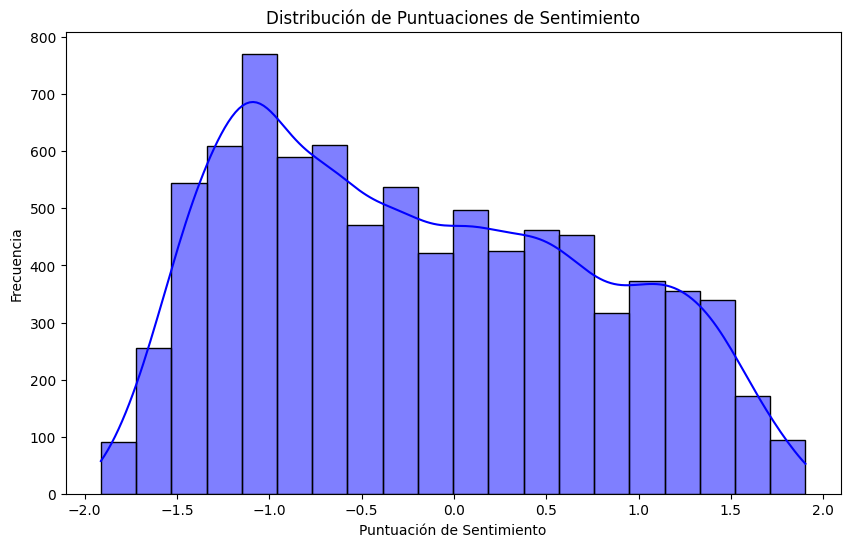

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Category'
# Aquí te muestro cómo hacer un gráfico de barras
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Sentiment_Score', data=df, hue='Sentiment_Score', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()

In [ ]:
import spacy

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Probar con un texto de ejemplo
doc = nlp("en sanpedro un canal de bajapresión en la sierra madre occidental y centro de provocará lluvias torrenciales en gro oax pue y ver intensas en camp tamps chis col hgo jal mich qroo slp tab y yuc muy fuertes en edomex gto mor nay nl qro y tlax")
for ent in doc.ents:
    print(ent.text, ent.label_)

sanpedro LOC
bajapresión LOC
sierra madre occidental LOC
gro oax pue ORG
edomex ORG
gto mor nay nl qro PER
tlax ORG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128677 (\N{HORIZONTAL TRAFFIC LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


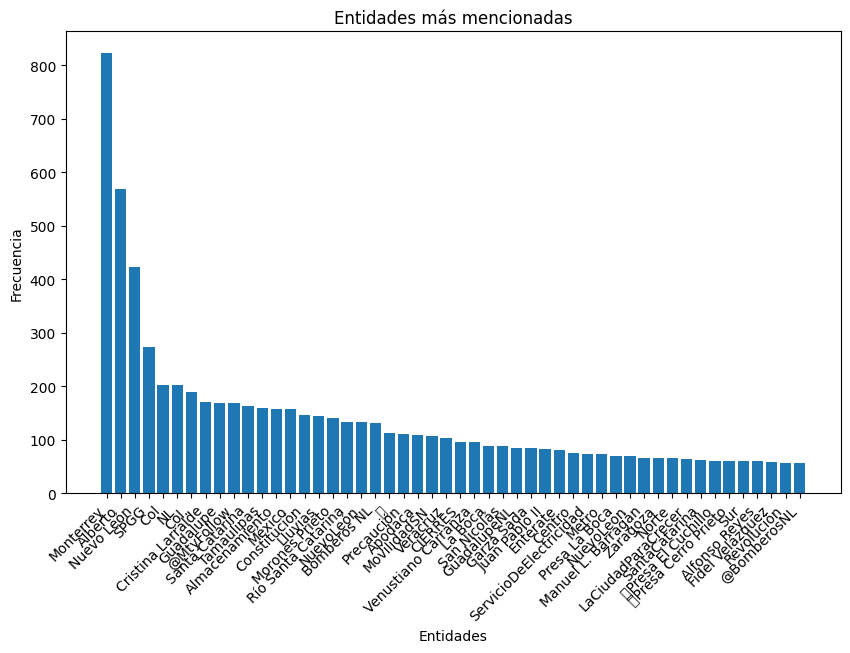

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(50)
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128677 (\N{HORIZONTAL TRAFFIC LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


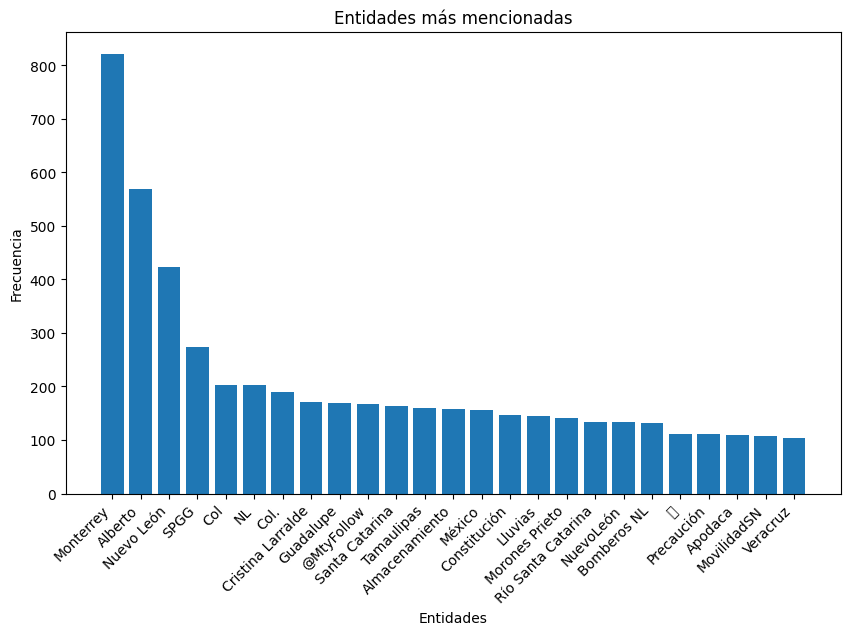

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Cargar el modelo de español grande
nlp = spacy.load("es_core_news_lg")

# Inicializar un Counter para contar las entidades
ent_counter = Counter()

# Crear una lista para almacenar las entidades de cada texto
entidades_list = []

# Procesar cada texto en la columna 'Texto'
for texto in df['Texto']:
    doc = nlp(texto)
    entidades = [ent.text for ent in doc.ents]
    entidades_list.append(entidades)
    # Contar las entidades para el histograma
    for ent in doc.ents:
        ent_counter[ent.text] += 1

# Añadir la columna 'entidades' al DataFrame
df['entidades'] = entidades_list

# Guardar el DataFrame con la nueva columna en un archivo CSV
df.to_csv('df_con_entidades.csv', index=False)

# Crear un histograma con las entidades más mencionadas
most_common_ents = ent_counter.most_common(25)
# Separar las entidades y sus frecuencias
entities, counts = zip(*most_common_ents)

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
!pip install vaderSentiment
!pip install textblob
!pip install transformers
!pip install torch
!pip install spacy
!pip install matplotlib seaborn

# Descargar el modelo de lenguaje para spaCy
!python -m spacy download es_core_news_lg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


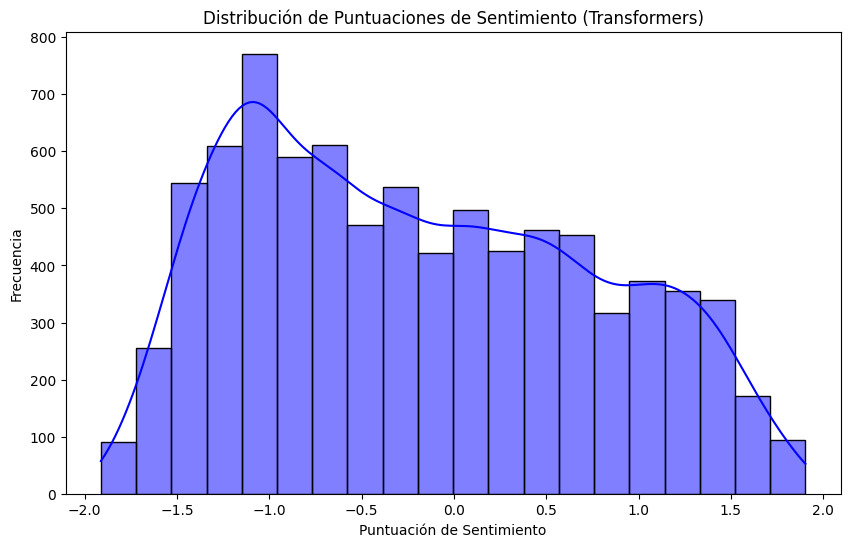

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128677 (\N{HORIZONTAL TRAFFIC LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


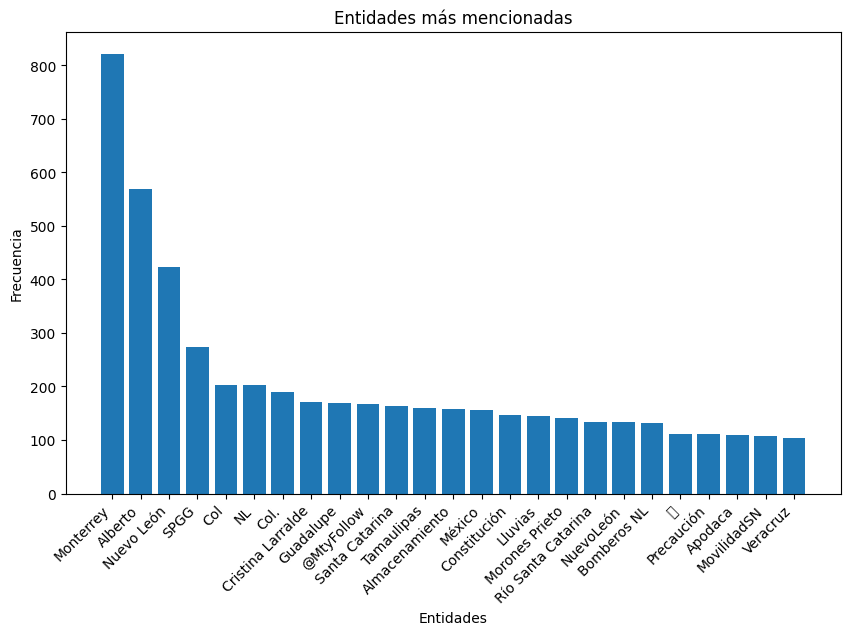

Análisis de sentimiento y visualización completados.


In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter

# Cargar el dataset CSV
df = pd.read_csv('/content/tweets_globales.csv')  # Cambia la ruta si es necesario

# Inicializar analizadores y modelo NLP
analyzer = SentimentIntensityAnalyzer()
nlp = spacy.load("es_core_news_lg")
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Diccionario de palabras clave con puntuaciones entre -2 y 2
palabras_clave = {
    'lluvia': -1, 'nublado': -1, 'tormenta': -1.5, 'viento': -1, 'granizo': -1.5,  # Clima
    'accidente': -1.5, 'choque': -1.5, 'derrape': -1.5, 'atropello': -2,  # Accidentes vehiculares
    'tráfico': -1, 'atasco': -1, 'congestión': -1, 'embotellamiento': -1.5,  # Problemas de tráfico
    'inundación': -2, 'desborde': -2, 'charco': -1, 'encharcamiento': -1.5,  # Problemas por agua
    'apagón': -1.5, 'falla': -1, 'electricidad': -1, 'corte': -1.5, 'colapso': -2,  # Problemas eléctricos
    'evacuación': -2, 'rescate': -1.5, 'desalojo': -2,  # Emergencias
    'muertos': -2, 'heridos': -1.5, 'destrucción': -2, 'incendio': -2,  # Consecuencias graves
    'explosión': -2, 'caos': -1.5, 'derrumbes': -2, 'colapsos': -2,  # Otros desastres
    'afectados': -1.5, 'perdidas': -2, 'daños': -1.5, 'colisión': -1.5,  # Impactos generales
    'caída': -1, 'árboles': -1, 'postes': -1, 'barrido': -1.5,  # Daños materiales
}

# Función para limpiar el texto
def limpiar_texto(texto):
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Función para analizar sentimiento con VADER y ponderación de palabras clave
def calcular_puntuacion_vader_ponderado(texto):
    texto_limpio = limpiar_texto(texto)
    sentiment_scores = analyzer.polarity_scores(texto_limpio)
    compound_score = sentiment_scores['compound']
    ponderacion_extra = sum(palabras_clave.get(palabra, 0) for palabra in texto_limpio.split())

    # Escalar el compound score de VADER a -1 a 1 y sumarlo a la ponderación extra
    puntuacion_total = compound_score + ponderacion_extra

    # Normalizar el puntaje total a -2 a 2
    puntuacion_total_normalizada = max(min(puntuacion_total, 2), -2)

    return puntuacion_total_normalizada

# Función para analizar sentimiento con TextBlob traducido
def calcular_puntuacion_textblob(texto):
    texto = limpiar_texto(texto)
    try:
        blob = TextBlob(texto)
        texto_traducido = blob.translate(to='en')
        return texto_traducido.sentiment.polarity * 2  # Escalar de -1 a 1 a -2 a 2
    except:
        return 0

# Función para analizar sentimiento con modelo de transformers
sentiment_labels = [-2, -1, 0, 1, 2]
def calcular_puntuacion_transformers(texto):
    try:
        inputs = tokenizer(texto, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        return sum([a*b for a, b in zip(sentiment_labels, scores)])
    except:
        return 0

# Función para extraer entidades con spaCy
def extraer_entidades(texto):
    doc = nlp(texto)
    return [ent.text for ent in doc.ents]

# Aplicar funciones al DataFrame
df['Texto'] = df['Texto'].fillna('').astype(str)
df['puntuacion_vader'] = df['Texto'].apply(calcular_puntuacion_vader_ponderado)
df['puntuacion_textblob'] = df['Texto'].apply(calcular_puntuacion_textblob)
df['puntuacion_transformers'] = df['Texto'].apply(calcular_puntuacion_transformers)
df['entidades'] = df['Texto'].apply(extraer_entidades)

# Guardar resultados en CSV
df.to_csv('/content/tweets_analizados.csv', index=False)

# Visualización: Distribución de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['puntuacion_transformers'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento (Transformers)')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de entidades más mencionadas
ent_counter = Counter(ent for entidades in df['entidades'] for ent in entidades)
most_common_ents = ent_counter.most_common(25)
entities, counts = zip(*most_common_ents)
plt.figure(figsize=(10, 6))
plt.bar(entities, counts)
plt.xticks(rotation=45, ha='right')
plt.title('Entidades más mencionadas')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.show()

print("Análisis de sentimiento y visualización completados.")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'


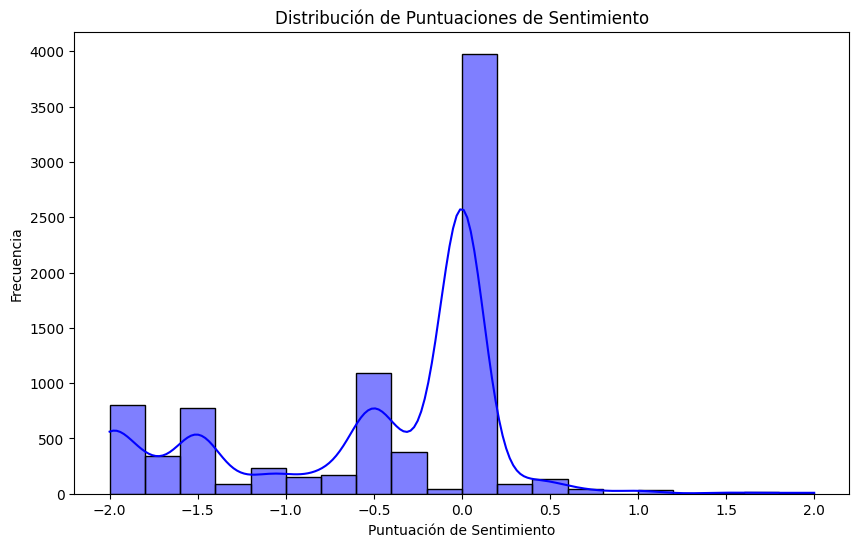

In [ ]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset CSV
df = pd.read_csv('tweets_globales.csv')  # Asegúrate de que el archivo esté en la misma carpeta que este script.

# Inicializar el analizador VADER
analyzer = SentimentIntensityAnalyzer()

# Inicializar el modelo de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Palabras clave negativas con sus ponderaciones
palabras_clave_negativas = {
    'lluvia': -0.5, 'nublado': -0.2, 'tormenta': -1.5, 'viento': -0.7, 'granizo': -1.5,
    'accidente': -1.5, 'choque': -1.7, 'derrape': -1.0, 'atropello': -2.0, 'tráfico': -0.5,
    'atasco': -0.7, 'congestión': -0.6, 'embotellamiento': -1.0, 'inundación': -2.0,
    'desborde': -1.8, 'charco': -0.3, 'encharcamiento': -0.8, 'apagón': -1.5, 'falla': -1.0,
    'electricidad': -0.5, 'corte': -1.2, 'colapso': -2.0, 'evacuación': -1.8, 'rescate': -1.2,
    'desalojo': -1.8, 'muertos': -2.0, 'heridos': -1.8, 'destrucción': -2.0, 'incendio': -1.8,
    'explosión': -2.0, 'caos': -1.5, 'derrumbes': -1.8, 'colapsos': -1.9, 'afectados': -1.4,
    'perdidas': -1.7, 'daños': -1.3, 'colisión': -1.5, 'caída': -0.7, 'árboles': -0.4,
    'postes': -0.8, 'barrido': -1.0, 'encharcado': -1.5, 'anegado': -2, 'socavón': -3.5,
    'desbordamiento': -3, 'deslave': -3, 'afectación vial': -2, 'atrapados': -2.5, 'bloqueo': -1.5,
    'cierre': -1.5, 'estragos': -2, 'caída de árbol': -2, 'caída de poste': -2
}

# Palabras clave positivas con sus ponderaciones
palabras_clave_positivas = {
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Función para traducir el texto al inglés
def traducir_al_ingles(texto):
    try:
        blob = TextBlob(texto)
        texto_traducido = str(blob.translate(to='en'))
        return texto_traducido
    except Exception:
        return texto

# Función para calcular la puntuación de sentimiento usando VADER y palabras clave
def calcular_puntuacion_con_ponderacion(texto):
    texto_limpio = limpiar_texto(texto)

    # Traducir al inglés
    texto_ingles = traducir_al_ingles(texto_limpio)

    # Análisis de sentimiento con VADER
    sentiment_scores = analyzer.polarity_scores(texto_ingles)
    compound_score = sentiment_scores['compound']

    # Ponderación basada en palabras clave negativas
    ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

    # Ponderación basada en palabras clave positivas
    ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

    # Calcular puntuación total
    puntuacion_total = compound_score + ponderacion_negativa + ponderacion_positiva
    return max(min(puntuacion_total, 2), -2)  # Limitar puntuación entre -2 y 2

# Asegurarse de que todos los valores en la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str)

# Aplicar la función al dataframe
df['puntuacion'] = df['Texto'].apply(calcular_puntuacion_con_ponderacion)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_nlp_ponderado.csv', index=False)
print("Análisis de sentimiento completado y guardado en 'tweets_puntuados_nlp_ponderado.csv'")

# Generar gráficos
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['puntuacion'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si hay una columna de categorías en el dataframe, podemos generar un gráfico de barras.
# Por ejemplo, si existe una columna 'Categoria'
if 'Categoria' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Categoria', y='puntuacion', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación de sentimiento a lo largo del tiempo (si existe la columna 'Timestamp')
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='puntuacion', data=df, hue='puntuacion', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


In [ ]:
!pip install vaderSentiment
!pip install textblob
!pip install transformers


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

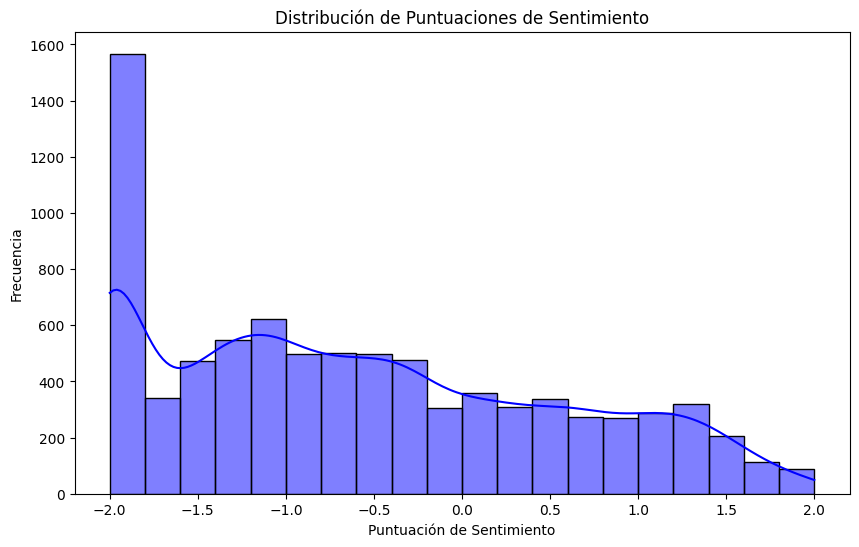

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Calibración ajustada de las palabras clave negativas (máximo -2)
palabras_clave_negativas = {
    'lluvia': -0.5, 'nublado': -0.2, 'tormenta': -1.5, 'viento': -0.7, 'granizo': -1.5,
    'accidente': -1.5, 'choque': -1.7, 'derrape': -1.0, 'atropello': -2.0, 'tráfico': -0.5,
    'atasco': -0.7, 'congestión': -0.6, 'embotellamiento': -1.0, 'inundación': -2.0,
    'desborde': -1.8, 'charco': -0.3, 'encharcamiento': -0.8, 'apagón': -1.5, 'falla': -1.0,
    'electricidad': -0.5, 'corte': -1.2, 'colapso': -2.0, 'evacuación': -1.8, 'rescate': -1.2,
    'desalojo': -1.8, 'muertos': -2.0, 'heridos': -1.8, 'destrucción': -2.0, 'incendio': -1.8,
    'explosión': -2.0, 'caos': -1.5, 'derrumbes': -1.8, 'colapsos': -1.9, 'afectados': -1.4,
    'perdidas': -1.7, 'daños': -1.3, 'colisión': -1.5, 'caída': -0.7, 'árboles': -0.4,
    'postes': -0.8, 'barrido': -1.0, 'encharcado': -1.5, 'anegado': -1.8, 'socavón': -2.0,
    'desbordamiento': -2.0, 'deslave': -2.0, 'afectación vial': -1.5, 'atrapados': -1.8, 'bloqueo': -1.5,
    'cierre': -1.5, 'estragos': -1.5, 'caída de árbol': -1.5, 'caída de poste': -1.5
}

# Calibración ajustada de las palabras clave positivas (máximo 2)
palabras_clave_positivas = {
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


In [ ]:
!pip install transformers


Columnas del archivo Excel: Index(['Usuario', 'Nombre', 'Fecha', 'Texto', 'Likes', 'Retweets',
       'Comentarios', 'Citas', 'Enlace', 'ImÃ¡genes', 'Videos', 'GIFs', 'Tipo',
       'Puntaje', 'Municipio'],
      dtype='object')
Columnas del archivo CSV: Index(['Usuario', 'Nombre', 'Fecha', 'Texto', 'Likes', 'Retweets',
       'Comentarios', 'Citas', 'Enlace', 'Imágenes', 'Videos', 'GIFs'],
      dtype='object')


<ipython-input-7-ec801dedb559>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tipo', y='Puntaje', data=df_summary, ci=None, palette='viridis')
<ipython-input-7-ec801dedb559>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tipo', y='Puntaje', data=df_summary, ci=None, palette='viridis')


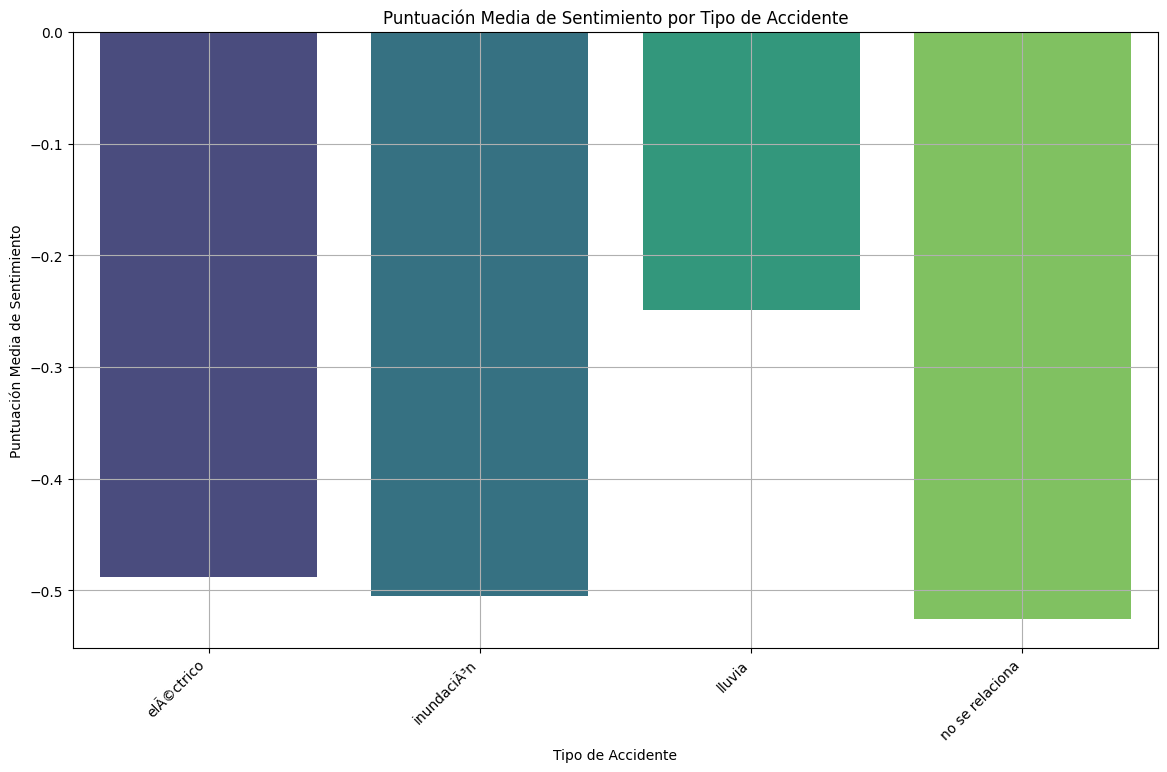

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modificar las rutas de los archivos subidos según corresponda
excel_path = 'ArchivoTony.xlsx'  # Ruta local del archivo Excel subido
csv_path = 'tweets_globales.csv'  # Ruta local del archivo CSV subido

# Leer los datos del Excel y el CSV
df_base = pd.read_excel(excel_path)
df_tweets = pd.read_csv(csv_path)

# Verificar las columnas del archivo Excel y CSV
print("Columnas del archivo Excel:", df_base.columns)
print("Columnas del archivo CSV:", df_tweets.columns)

# Rellenar valores vacíos en la columna 'Tipo' del archivo Excel
df_base['Tipo'] = df_base['Tipo'].fillna('No se relaciona')

# Asegurarse de que la columna 'Texto' existe en ambos DataFrames
if 'Texto' not in df_base.columns or 'Texto' not in df_tweets.columns:
    print("La columna 'Texto' no se encuentra en ambos DataFrames. Asegúrate de tener la columna 'Texto' en ambos archivos.")
else:
    # Unir ambos DataFrames basados en la columna 'Texto'
    df_combined = pd.merge(df_base, df_tweets, on='Texto', how='left')

    # Calcular la puntuación media de sentimiento por cada tipo de accidente
    df_summary = df_combined.groupby('Tipo')['Puntaje'].mean().reset_index()

    # Graficar la puntuación media de sentimiento por tipo de accidente
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Tipo', y='Puntaje', data=df_summary, ci=None, palette='viridis')
    plt.title('Puntuación Media de Sentimiento por Tipo de Accidente')
    plt.xlabel('Tipo de Accidente')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

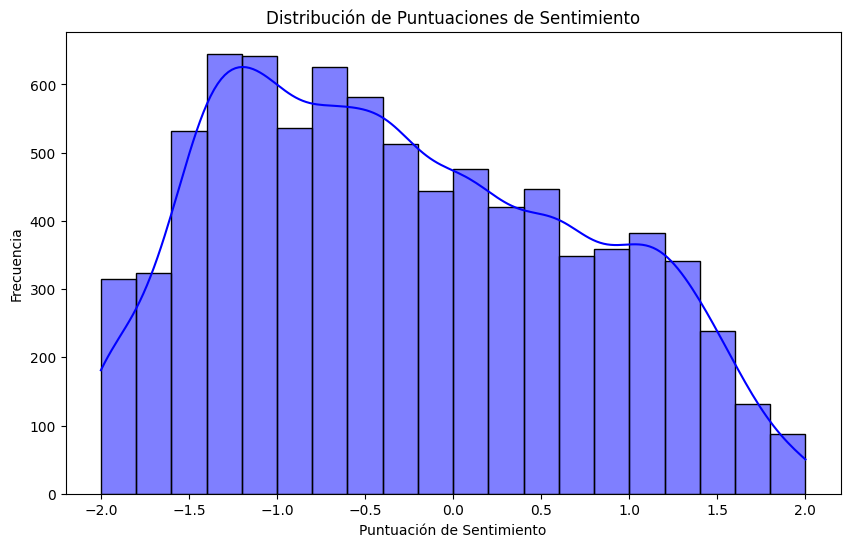

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Nuevas ponderaciones para palabras clave negativas
palabras_clave_negativas = {
    'muertos': -1.8, 'inundación': -1.4, 'colapso': -1.4, 'atropello': -1.0, 'destrucción': -0.6,
    'explosión': -1.2, 'desalojo': -0.4, 'heridos': -0.8, 'incendio': -0.4, 'derrumbes': -1.2,
    'desborde': -0.8, 'evacuación': -0.9, 'colapsos': -1.3, 'choque': -0.6, 'perdidas': -1.6,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.4, 'colisión': -0.6, 'apagón': -0.2,
    'rescate': -0.4, 'corte': -0.2, 'daños': -0.4, 'afectado': -0.4, 'fallas': -0.2,
    'barrido': -0.4, 'derrape': -0.1, 'embotellamiento': -0.05, 'encharcamiento': -0.02,
    'postes': -0.2, 'viento': -0.01, 'atasco': -0.1, 'caída': -0.3, 'congestión': -0.1,
    'tráfico': 0.08, 'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.35, 'charco': -0.15,
    'nublado': -0.01
}

# Ponderaciones para palabras clave positivas (máximo 2)
palabras_clave_positivas = {
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

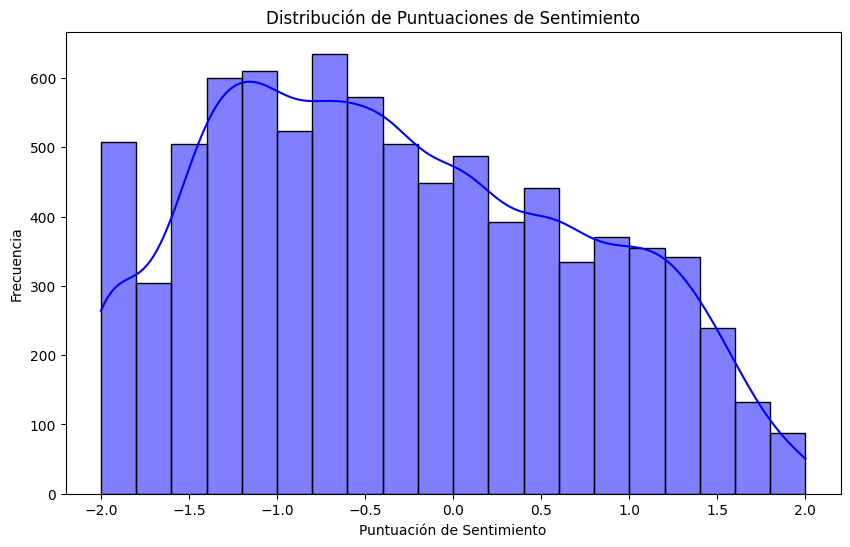

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Calibración ajustada de las palabras clave negativas (máximo -1.8)
palabras_clave_negativas = {
    'muertos': -1.8, 'inundación': -1.5, 'colapso': -1.4, 'atropello': -1.3, 'destrucción': -1.0,
    'explosión': -1.4, 'desalojo': -0.5, 'heridos': -1.2, 'incendio': -0.8, 'derrumbes': -1.2,
    'desborde': -1.0, 'evacuación': -1.0, 'colapsos': -1.3, 'choque': -0.9, 'perdidas': -1.4,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.7, 'colisión': -0.8, 'apagón': -0.4,
    'rescate': -0.6, 'corte': -0.4, 'daños': -0.5, 'afectado': -0.6, 'fallas': -0.4,
    'barrido': -0.4, 'derrape': -0.3, 'embotellamiento': -0.15, 'encharcamiento': -0.1,
    'postes': -0.5, 'viento': -0.02, 'atasco': -0.2, 'caída': -0.5, 'congestión': -0.2,
    'tráfico': 0.08, 'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.6, 'charco': -0.05,
    'nublado': -0.01
}


# Calibración ajustada de las palabras clave positivas (máximo 2)
palabras_clave_positivas = {
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


In [ ]:
import pandas as pd
import re
from collections import Counter

# Cargar el archivo CSV
file_path = "tweets_globales.csv"
df = pd.read_csv(file_path)

# Función para limpiar y tokenizar el texto
def limpiar_y_tokenizar(texto):
    if not isinstance(texto, str):
        return []
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    palabras = texto.split()  # Dividir en palabras
    return palabras

# Aplicar la función a la columna 'Texto' y contar las palabras
todas_las_palabras = df['Texto'].apply(limpiar_y_tokenizar).sum()
contador_palabras = Counter(todas_las_palabras)

# Obtener las 50 palabras más comunes
palabras_comunes = contador_palabras.most_common(50)

# Crear un DataFrame con las palabras y su conteo
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Conteo'])

# Mostrar la tabla
import ace_tools as tools; tools.display_dataframe_to_user(name="Conteo de Palabras Comunes en Tweets", dataframe=df_palabras_comunes)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd

# Supongamos que `df_palabras_comunes` ya contiene la tabla con las palabras y su conteo
# Mostrar la tabla en formato textual
print(df_palabras_comunes)

# O guardar la tabla en un archivo CSV
df_palabras_comunes.to_csv("conteo_palabras_comunes.csv", index=False)
print("El archivo 'conteo_palabras_comunes.csv' ha sido guardado con éxito.")


      Palabra  Conteo
0          de   13331
1          en    7601
2          la    7379
3           y    5705
4           a    4776
5          el    4739
6         las    2601
7         que    2558
8          se    2469
9         del    2300
10        por    2265
11        los    1842
12        con    1561
13         al    1479
14         un    1439
15       para    1315
16  monterrey    1101
17    lluvias    1031
18         no    1026
19    alberto    1000
20         av     814
21        una     715
22         su     683
23      nuevo     678
24       zona     641
25       león     614
26        más     611
27         nl     610
28         es     594
29        san     565
30   tormenta     546
31      presa     540
32        col     517
33       agua     504
34        río     497
35      santa     482
36       como     482
37      sobre     477
38        sin     471
39     lluvia     436
40       este     419
41         lo     400
42         ya     398
43        sur     393
44   catar

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import re
from collections import Counter

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'
df = pd.read_csv(file_path)

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    return texto

# Limpiar la columna de texto
df['Texto_Limpio'] = df['Texto'].apply(limpiar_texto)

# Contar las palabras
palabras = ' '.join(df['Texto_Limpio']).split()
conteo_palabras = Counter(palabras)

# Obtener las 150 palabras más comunes
palabras_comunes = conteo_palabras.most_common(150)

# Crear un DataFrame con las palabras más comunes y su conteo
df_palabras_comunes = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla
import pandas as pd; from IPython.display import display; display(df_palabras_comunes)

# Guardar el DataFrame en un archivo CSV
df_palabras_comunes.to_csv('conteo_palabras_comunes_150.csv', index=False)

print("Tabla de las 150 palabras más comunes guardada en 'conteo_palabras_comunes_150.csv'")


,Palabra,Frecuencia
0,de,13331
1,en,7601
2,la,7379
3,y,5705
4,a,4776
...,...,...
145,pm,167
146,ayd_monterrey,165
147,pedro,165
148,garcía,165


Tabla de las 150 palabras más comunes guardada en 'conteo_palabras_comunes_150.csv'


In [ ]:
from google.colab import files
files.download('conteo_palabras_comunes_150.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

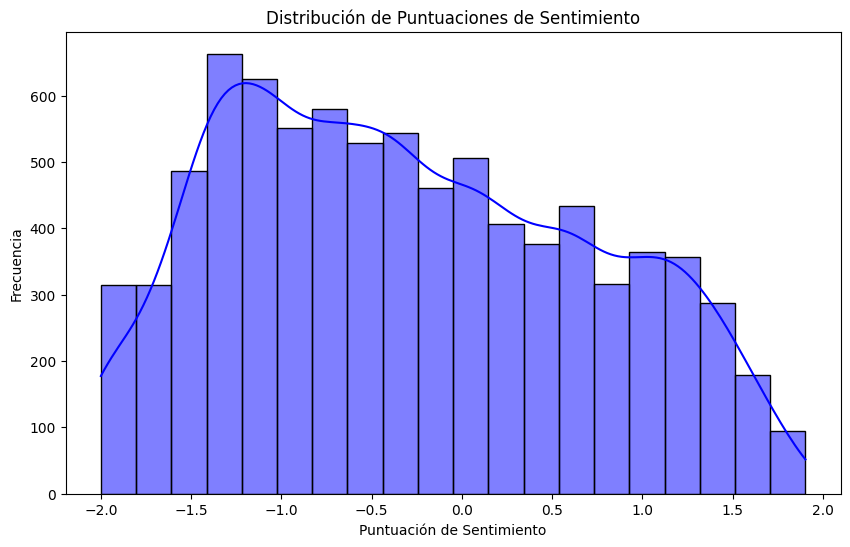

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment textblob transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Etiquetas de sentimiento

# Palabras clave con ponderaciones ajustadas
palabras_clave_ponderadas = {
    'muertos': -1.8, 'inundación': -1.4, 'colapso': -1.4, 'atropello': -1.0, 'destrucción': -0.6,
    'explosión': -1.2, 'desalojo': -0.4, 'heridos': -0.8, 'incendio': -0.4, 'derrumbes': -1.2,
    'desborde': -0.8, 'evacuación': -0.9, 'colapsos': -1.3, 'choque': -0.6, 'perdidas': -1.6,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.4, 'colisión': -0.6, 'apagón': -0.2,
    'rescate': -0.4, 'corte': -0.2, 'daños': -0.4, 'afectado': -0.4, 'fallas': -0.2,
    'barrido': -0.4, 'derrape': -0.1, 'embotellamiento': -0.05, 'encharcamiento': -0.02,
    'postes': -0.2, 'viento': -0.01, 'atasco': -0.1, 'caída': -0.3, 'congestión': -0.1,
    'tráfico': 0.08, 'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.35, 'charco': -0.15,
    'nublado': -0.01
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    try:
        if text.strip() == "":
            return 0

        # Calcular el puntaje usando transformers
        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave ponderadas
        ponderacion = sum(peso for palabra, peso in palabras_clave_ponderadas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

<ipython-input-5-fffe25ce69b8>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categoria', data=df, palette='coolwarm')


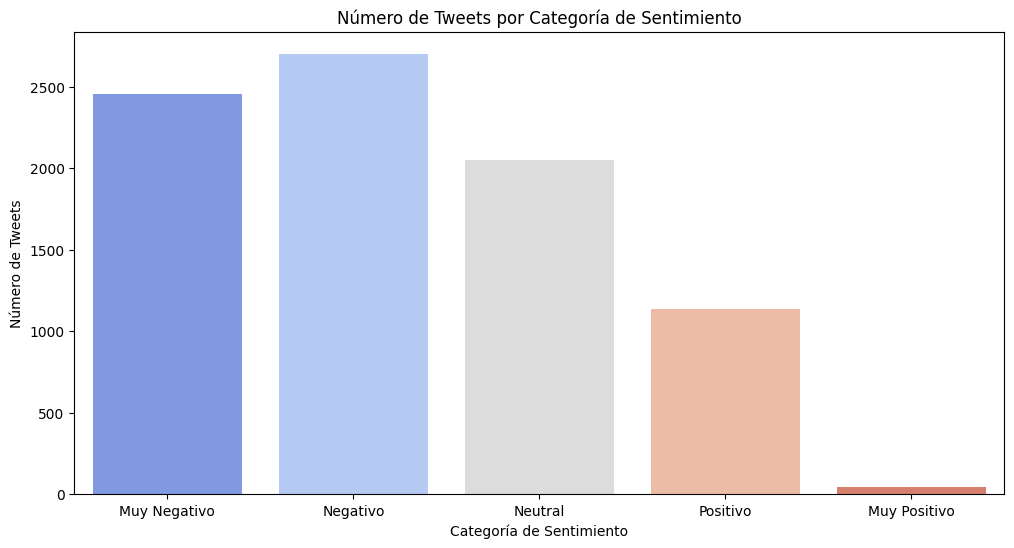

<ipython-input-5-fffe25ce69b8>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_grupo, palette='coolwarm')


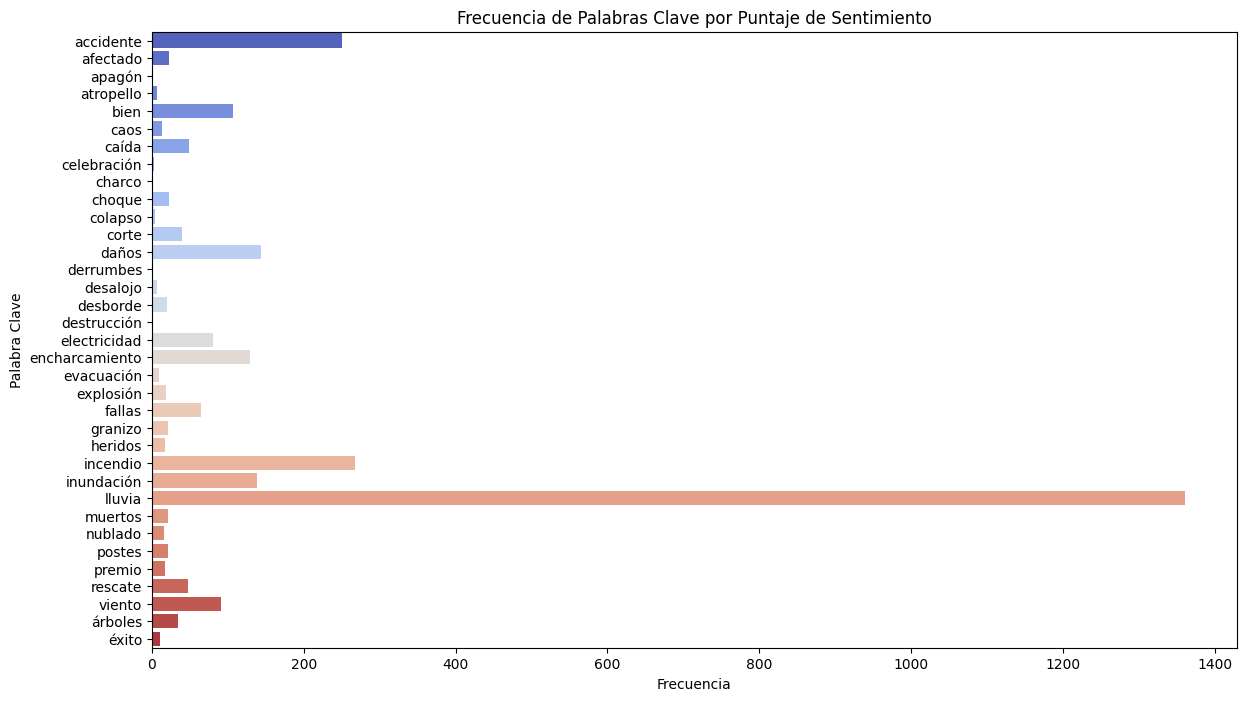

<ipython-input-5-fffe25ce69b8>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Categoria', y='Puntaje', data=df, jitter=True, palette='coolwarm')


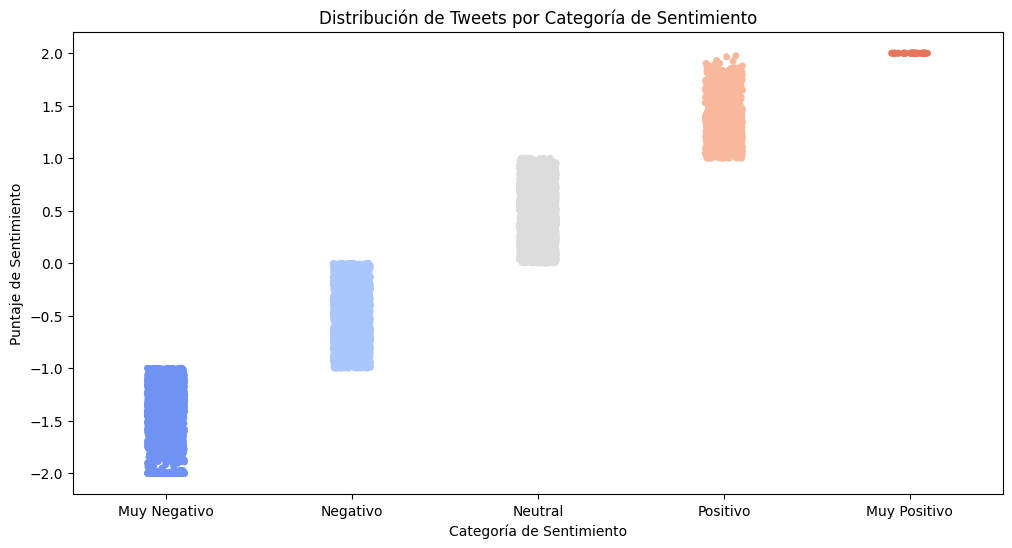

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Calibración ajustada de las palabras clave negativas y positivas
palabras_clave = {
    # Palabras negativas
    'muertos': -1.8, 'inundación': -1.4, 'colapso': -1.4, 'atropello': -1.0, 'destrucción': -0.6,
    'explosión': -1.2, 'desalojo': -0.4, 'heridos': -0.8, 'incendio': -0.4, 'derrumbes': -1.2,
    'desborde': -0.8, 'evacuación': -0.9, 'colapsos': -1.3, 'choque': -0.6, 'perdidas': -1.6,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.4, 'colisión': -0.6, 'apagón': -0.2,
    'rescate': -0.4, 'corte': -0.2, 'daños': -0.4, 'afectado': -0.4, 'fallas': -0.2,
    'barrido': -0.4, 'derrape': -0.1, 'embotellamiento': -0.05, 'encharcamiento': -0.02,
    'postes': -0.2, 'viento': -0.01, 'atasco': -0.1, 'caída': -0.3, 'congestión': -0.1,
    'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.35, 'charco': -0.15, 'nublado': -0.01,

    # Palabras positivas
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    try:
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas y positivas
        ponderacion_palabras = sum(peso for palabra, peso in palabras_clave.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_palabras

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Crear categorías basadas en las puntuaciones de sentimiento
def categorizar_sentimiento(puntuacion):
    if puntuacion < -1:
        return "Muy Negativo"
    elif -1 <= puntuacion < 0:
        return "Negativo"
    elif 0 <= puntuacion < 1:
        return "Neutral"
    elif 1 <= puntuacion < 2:
        return "Positivo"
    else:
        return "Muy Positivo"

# Crear una nueva columna con la categoría de sentimiento
df['Categoria'] = df['Puntaje'].apply(categorizar_sentimiento)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados_categorias.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución

# Gráfico de barras de la cantidad de tweets en cada categoría
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoria', data=df, palette='coolwarm')
plt.title('Número de Tweets por Categoría de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()

# Gráfico de barras para el número de palabras clave en cada categoría
# Crear un nuevo dataframe que contenga solo las palabras clave
palabras_en_tweets = []
for texto in df['Texto']:
    texto_limpio = limpiar_texto(texto)
    palabras_presentes = [palabra for palabra in palabras_clave if palabra in texto_limpio]
    palabras_en_tweets.extend(palabras_presentes)

df_palabras = pd.DataFrame(palabras_en_tweets, columns=['Palabra'])
df_palabras['Puntaje'] = df_palabras['Palabra'].map(palabras_clave)

# Agrupar por palabras y contar la cantidad de ocurrencias
df_palabras_grupo = df_palabras.groupby(['Palabra', 'Puntaje']).size().reset_index(name='Frecuencia')

# Gráfico de barras para la cantidad de cada palabra clave
plt.figure(figsize=(14, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_grupo, palette='coolwarm')
plt.title('Frecuencia de Palabras Clave por Puntaje de Sentimiento')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.show()

# Scatter plot para visualizar la cantidad de tweets por categoría de sentimiento
plt.figure(figsize=(12, 6))
sns.stripplot(x='Categoria', y='Puntaje', data=df, jitter=True, palette='coolwarm')
plt.title('Distribución de Tweets por Categoría de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Puntaje de Sentimiento')
plt.show()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

<ipython-input-4-3dbb8385d234>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Categoria', data=df, palette='coolwarm')


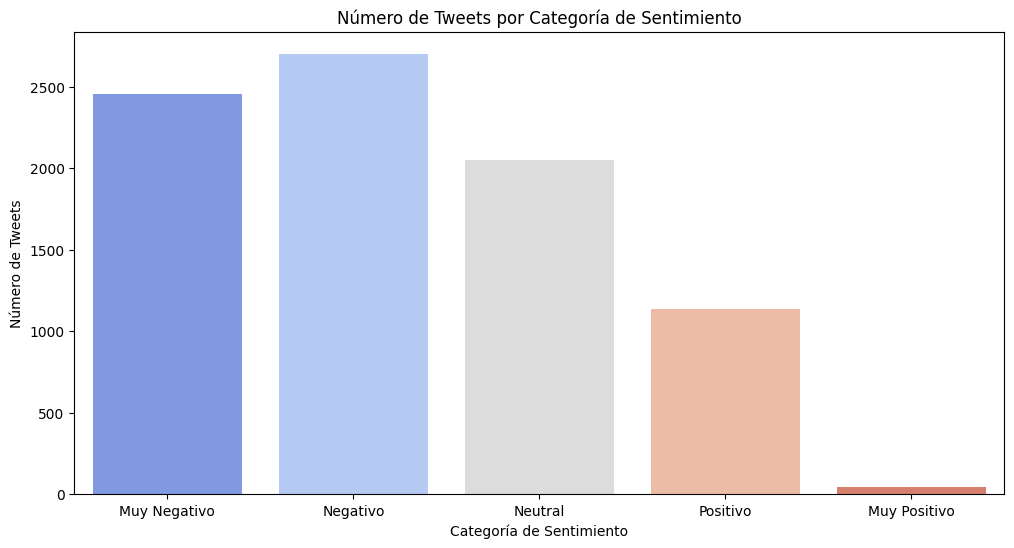

<ipython-input-4-3dbb8385d234>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_grupo, palette='coolwarm')


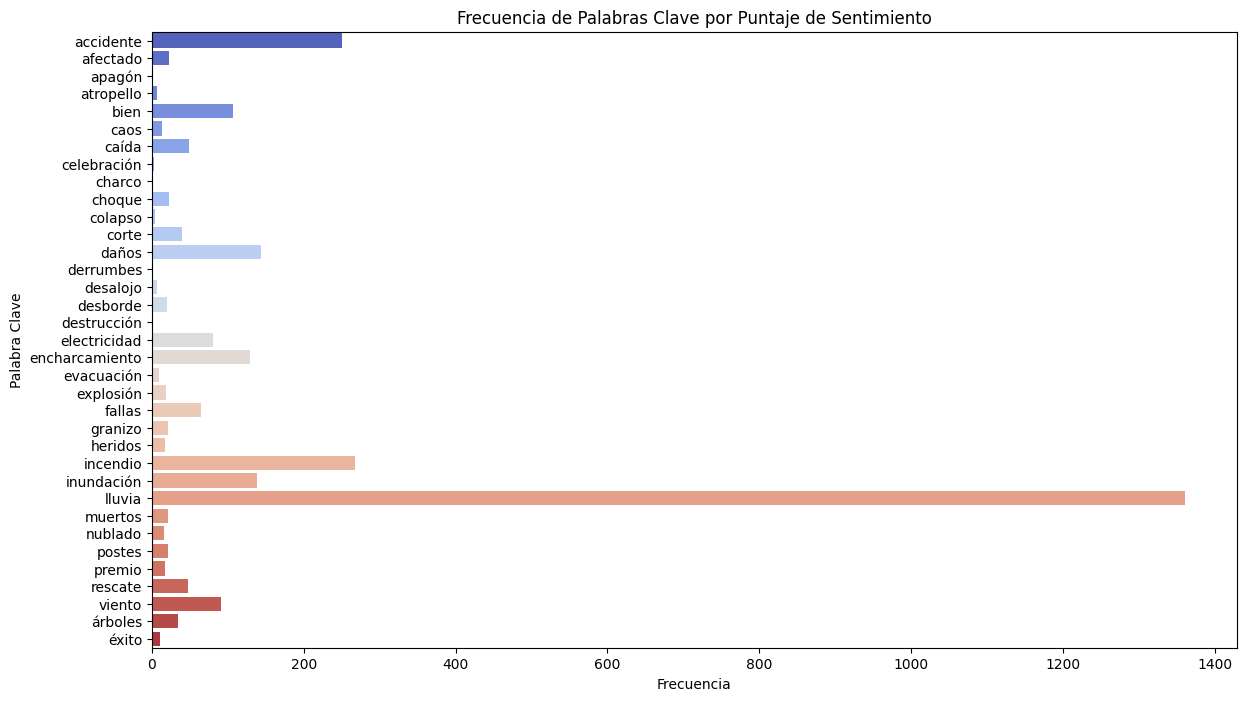

<ipython-input-4-3dbb8385d234>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Categoria', y='Puntaje', data=df, jitter=True, palette='coolwarm')


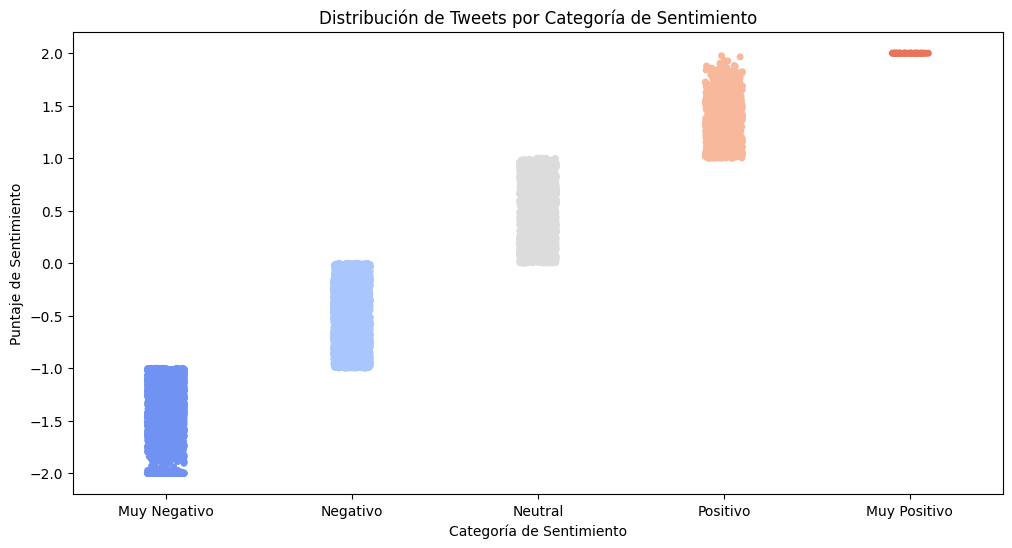

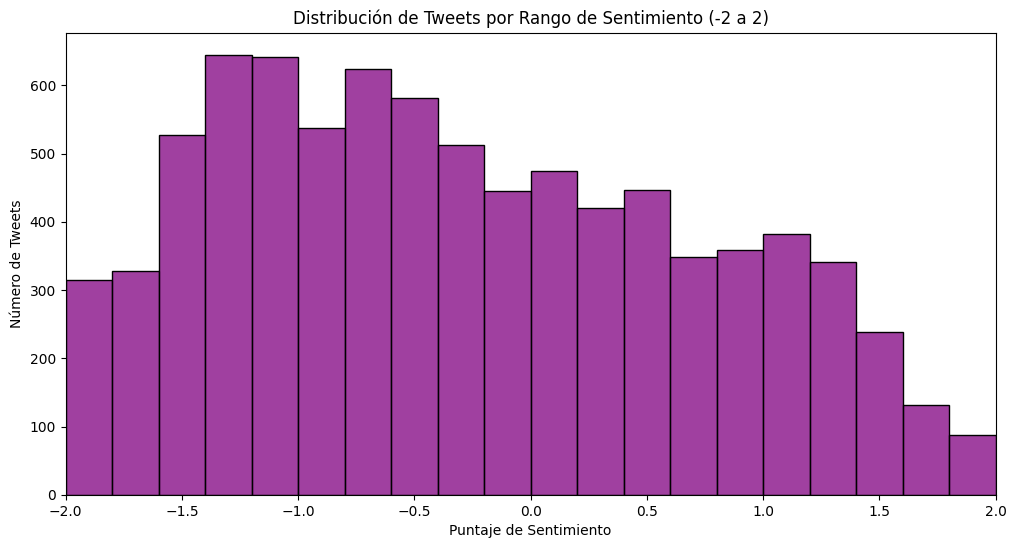

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Calibración ajustada de las palabras clave negativas y positivas
palabras_clave = {
    # Palabras negativas
    'muertos': -1.8, 'inundación': -1.4, 'colapso': -1.4, 'atropello': -1.0, 'destrucción': -0.6,
    'explosión': -1.2, 'desalojo': -0.4, 'heridos': -0.8, 'incendio': -0.4, 'derrumbes': -1.2,
    'desborde': -0.8, 'evacuación': -0.9, 'colapsos': -1.3, 'choque': -0.6, 'perdidas': -1.6,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.4, 'colisión': -0.6, 'apagón': -0.2,
    'rescate': -0.4, 'corte': -0.2, 'daños': -0.4, 'afectado': -0.4, 'fallas': -0.2,
    'barrido': -0.4, 'derrape': -0.1, 'embotellamiento': -0.05, 'encharcamiento': -0.02,
    'postes': -0.2, 'viento': -0.01, 'atasco': -0.1, 'caída': -0.3, 'congestión': -0.1,
    'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.35, 'charco': -0.15, 'nublado': -0.01,

    # Palabras positivas
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    try:
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas y positivas
        ponderacion_palabras = sum(peso for palabra, peso in palabras_clave.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_palabras

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Crear categorías basadas en las puntuaciones de sentimiento
def categorizar_sentimiento(puntuacion):
    if puntuacion < -1:
        return "Muy Negativo"
    elif -1 <= puntuacion < 0:
        return "Negativo"
    elif 0 <= puntuacion < 1:
        return "Neutral"
    elif 1 <= puntuacion < 2:
        return "Positivo"
    else:
        return "Muy Positivo"

# Crear una nueva columna con la categoría de sentimiento
df['Categoria'] = df['Puntaje'].apply(categorizar_sentimiento)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados_categorias.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución

# Gráfico de barras de la cantidad de tweets en cada categoría
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoria', data=df, palette='coolwarm')
plt.title('Número de Tweets por Categoría de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()

# Gráfico de barras para el número de palabras clave en cada categoría
# Crear un nuevo dataframe que contenga solo las palabras clave
palabras_en_tweets = []
for texto in df['Texto']:
    texto_limpio = limpiar_texto(texto)
    palabras_presentes = [palabra for palabra in palabras_clave if palabra in texto_limpio]
    palabras_en_tweets.extend(palabras_presentes)

df_palabras = pd.DataFrame(palabras_en_tweets, columns=['Palabra'])
df_palabras['Puntaje'] = df_palabras['Palabra'].map(palabras_clave)

# Agrupar por palabras y contar la cantidad de ocurrencias
df_palabras_grupo = df_palabras.groupby(['Palabra', 'Puntaje']).size().reset_index(name='Frecuencia')

# Gráfico de barras para la cantidad de cada palabra clave
plt.figure(figsize=(14, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras_grupo, palette='coolwarm')
plt.title('Frecuencia de Palabras Clave por Puntaje de Sentimiento')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra Clave')
plt.show()

# Scatter plot para visualizar la cantidad de tweets por categoría de sentimiento
plt.figure(figsize=(12, 6))
sns.stripplot(x='Categoria', y='Puntaje', data=df, jitter=True, palette='coolwarm')
plt.title('Distribución de Tweets por Categoría de Sentimiento')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Puntaje de Sentimiento')
plt.show()

# Nueva Gráfica de Barras para distribución de tweets por rango de sentimiento de -2 a 2
plt.figure(figsize=(12, 6))
sns.histplot(df['Puntaje'], bins=20, kde=False, color='purple')
plt.title('Distribución de Tweets por Rango de Sentimiento (-2 a 2)')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Número de Tweets')
plt.xlim(-2, 2)
plt.show()


In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Ponderación ajustada de palabras clave negativas
palabras_clave_negativas = {
    'muertos': -1.8, 'inundación': -1.5, 'colapso': -1.4, 'atropello': -1.3, 'destrucción': -1.0,
    'explosión': -1.4, 'desalojo': -0.5, 'heridos': -1.2, 'incendio': -0.8, 'derrumbes': -1.2,
    'desborde': -1.0, 'evacuación': -1.0, 'colapsos': -1.3, 'choque': -0.9, 'perdidas': -1.4,
    'caos': -1.5, 'granizo': -1.1, 'accidente': -0.7, 'colisión': -0.8, 'apagón': -0.4,
    'rescate': -0.6, 'corte': -0.4, 'daños': -0.5, 'afectado': -0.6, 'fallas': -0.4,
    'barrido': -0.4, 'derrape': -0.3, 'embotellamiento': -0.15, 'encharcamiento': -0.1,
    'postes': -0.5, 'viento': -0.02, 'atasco': -0.2, 'caída': -0.5, 'congestión': -0.2,
    'tráfico': 0.08, 'electricidad': -0.3, 'lluvia': -0.15, 'árboles': -0.6, 'charco': -0.05,
    'nublado': -0.01
}

# Ponderación ajustada de palabras clave positivas
palabras_clave_positivas = {
    'celebración': 1.5, 'festivo': 1.0, 'éxito': 2.0, 'premio': 1.8, 'bien': 1.0,
    'mejor': 1.2, 'positivo': 1.3, 'avance': 1.4, 'solución': 1.5
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()

# Gráfico de barras que muestra la cantidad de tweets por cada palabra clave negativa y positiva
palabras_uso = {**palabras_clave_negativas, **palabras_clave_positivas}
frecuencia_palabras = {palabra: 0 for palabra in palabras_uso.keys()}

# Contar la frecuencia de cada palabra clave en los tweets
for texto in df['Texto']:
    for palabra in palabras_uso.keys():
        if palabra in texto:
            frecuencia_palabras[palabra] += 1

# Crear un DataFrame de las palabras y sus frecuencias
df_frecuencia = pd.DataFrame(list(frecuencia_palabras.items()), columns=['Palabra', 'Frecuencia'])
df_frecuencia = df_frecuencia[df_frecuencia['Frecuencia'] > 0]  # Filtrar palabras con frecuencia mayor a 0

# Graficar el uso de palabras con su puntuación
plt.figure(figsize=(15, 8))
sns.barplot(x='Frecuencia', y='Palabra', data=df_frecuencia.sort_values('Frecuencia', ascending=False), palette='coolwarm')
plt.title('Frecuencia de Palabras Clave en Tweets')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

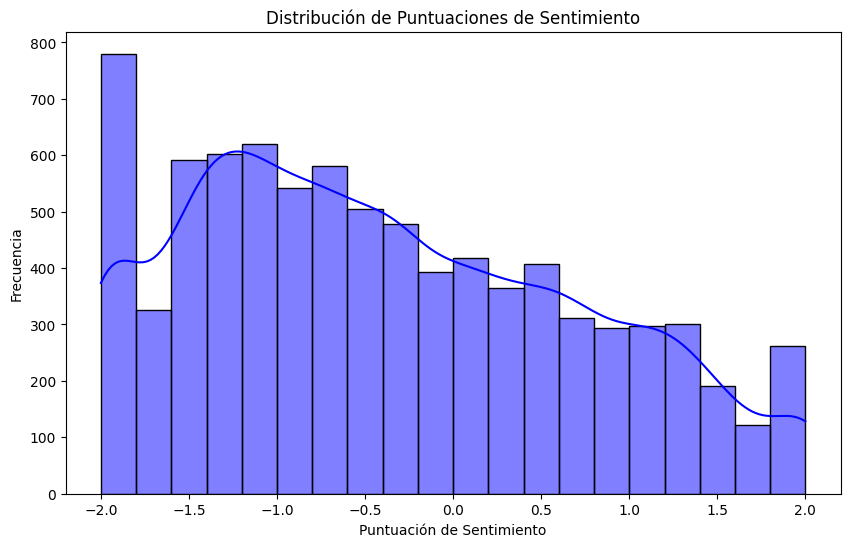

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Asignación de valores a las etiquetas de sentimiento
sentiment_labels = [-2, -1, 0, 1, 2]  # Cambiar si se utilizan etiquetas diferentes

# Calibración ajustada de palabras clave negativas (máximo -1.75)
palabras_clave_negativas = {
    'muertos': -1.750, 'inundación': -1.500, 'colapso': -1.400, 'atropello': -1.250,
    'destrucción': -0.850, 'explosión': -1.300, 'desalojo': -0.400, 'heridos': -1.100,
    'incendio': -0.750, 'derrumbes': -1.200, 'desborde': -0.900, 'evacuación': -0.800,
    'colapsos': -1.250, 'choque': -0.700, 'perdidas': -1.400, 'caos': -1.600,
    'granizo': -0.800, 'accidente': -0.550, 'colisión': -0.700, 'apagón': -0.350,
    'rescate': -0.600, 'corte': -0.400, 'daños': -0.450, 'afectado': -0.550, 'fallas': -0.300,
    'barrido': -0.350, 'derrape': -0.300, 'embotellamiento': -0.150, 'encharcamiento': -0.100,
    'postes': -0.500, 'viento': -0.050, 'atasco': -0.200, 'caída': -0.400, 'congestión': -0.200,
    'tráfico': 0.080, 'electricidad': -0.250, 'lluvia': -0.200, 'árboles': -0.500,
    'charco': -0.050, 'nublado': -0.025, 'bloqueo': -0.300, 'fuego': -1.200, 'desorden': -0.850,
    'caída de árboles': -0.750, 'deslizamiento': -1.200, 'derrumbe': -1.300, 'accidente grave': -1.400,
    'derrames': -1.100, 'emergencia': -1.200, 'colisión múltiple': -1.250, 'fallecidos': -1.600,
    'suicidio': -1.650, 'violencia': -1.700, 'secuestro': -1.650, 'tormenta': -0.900, 'homicidio': -1.700,
    'tragedia': -1.600, 'colapso vial': -1.200, 'desgajamiento': -1.300
}

# Calibración ajustada de palabras clave positivas (máximo 2)
palabras_clave_positivas = {
    'celebración': 1.500, 'festivo': 1.000, 'éxito': 2.000, 'premio': 1.800, 'bien': 1.000,
    'mejor': 1.200, 'positivo': 1.300, 'avance': 1.400, 'solución': 1.500, 'felicidad': 1.600,
    'felicitaciones': 1.700, 'orgullo': 1.750, 'alegría': 1.800, 'progreso': 1.550,
    'superación': 1.650, 'apoyo': 1.400, 'esperanza': 1.500, 'bienestar': 1.350,
    'crecimiento': 1.400, 'solidaridad': 1.500, 'amabilidad': 1.300, 'colaboración': 1.350,
    'éxitos': 1.700, 'triunfo': 2.000, 'innovación': 1.450, 'empatía': 1.300,
    'gratitud': 1.550, 'entusiasmo': 1.500, 'perseverancia': 1.600, 'optimismo': 1.700
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()

# Gráfico de barras que muestra la cantidad de tweets por cada palabra clave negativa y


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   Usuario Nombre                        Fecha  \
0  @Cicmty    CIC  Jun 22, 2024 · 12:29 AM UTC   
1  @Cicmty    CIC  Jun 22, 2024 · 12:23 AM UTC   
2  @Cicmty    CIC  Jun 22, 2024 · 12:20 AM UTC   
3  @Cicmty    CIC  Jun 22, 2024 · 12:17 AM UTC   
4  @Cicmty    CIC  Jun 22, 2024 · 12:14 AM UTC   

                                               Texto  Likes  Retweets  \
0  💡#ServicioDeElectricidad sin servicio en Clave...      0         0   
1  #Registro sin tapa en  Simón Bolívar y Celaya,...      2         0   
2  💡#ServicioDeElectricidad sin servicio en Pedre...      0         0   
3  💧#CuidadoDelAgua sin suministro en la Col. Ped...      0         0   
4  💧#CuidadoDelAgua sin suministro en la Col. Con...      1         0   

   Comentarios  Citas                                             Enlace  \
0            0      0  https://twitter.com/Cicmty/status/180431067341...   
1            0      0  https://twitter.com/Cicmty/status/180430925545...   
2            0      0  https://t

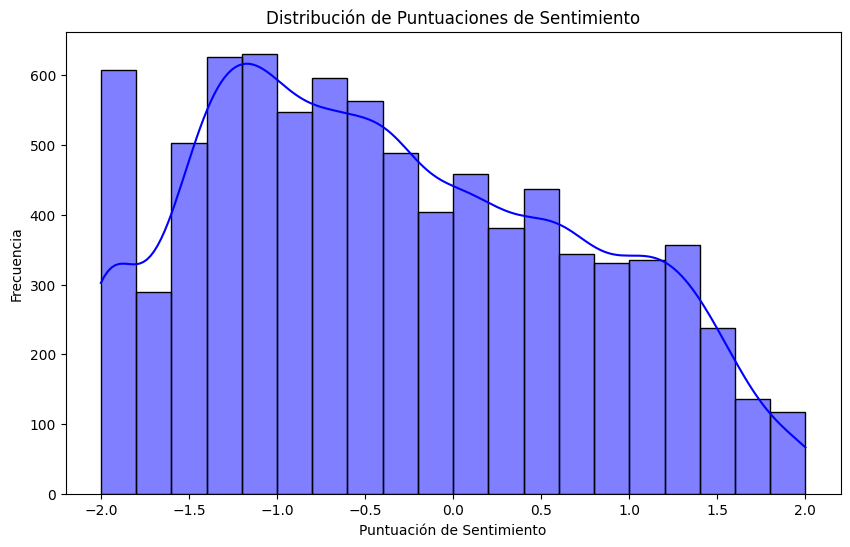

In [ ]:
# Instalar dependencias necesarias
!pip install vaderSentiment
!pip install textblob
!pip install transformers

# Importar las bibliotecas necesarias
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Cargar el archivo CSV
file_path = 'tweets_globales.csv'  # Cambia esta ruta si es necesario
df = pd.read_csv(file_path)

# Inicializar el modelo y el tokenizer de transformers
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Listas iniciales de palabras clave negativas y positivas convertidas a diccionario con valores iniciales de 0
palabras_clave_negativas = {
    'muertos': 0, 'inundación': 0, 'colapso': 0, 'atropello': 0, 'destrucción': 0, 'explosión': 0,
    'desalojo': 0, 'heridos': 0, 'incendio': 0, 'derrumbes': 0, 'desborde': 0, 'evacuación': 0,
    'colapsos': 0, 'choque': 0, 'perdidas': 0, 'caos': 0, 'granizo': 0, 'accidente': 0, 'colisión': 0,
    'apagón': 0, 'rescate': 0, 'corte': 0, 'daños': 0, 'afectado': 0, 'fallas': 0, 'barrido': 0,
    'derrape': 0, 'embotellamiento': 0, 'encharcamiento': 0, 'postes': 0, 'viento': 0, 'atasco': 0,
    'caída': 0, 'congestión': 0, 'tráfico': 0, 'electricidad': 0, 'lluvia': 0, 'árboles': 0, 'charco': 0,
    'nublado': 0
}

palabras_clave_positivas = {
    'celebración': 1.0, 'festivo': 1.0, 'éxito': 1.0, 'premio': 1.0, 'bien': 1.0
}

# Función para limpiar el texto y quitar símbolos
def limpiar_texto(texto):
    if not isinstance(texto, str):
        texto = ""
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

# Asegurarse de que todos los valores de la columna 'Texto' sean cadenas
df['Texto'] = df['Texto'].astype(str).fillna('')

# Limpiar el texto y contar la frecuencia de las palabras clave
textos_limpios = df['Texto'].apply(limpiar_texto)
frecuencia_palabras = Counter()

# Contar frecuencia de palabras clave en los tweets
for texto in textos_limpios:
    palabras = texto.split()
    for palabra in palabras:
        if palabra in palabras_clave_negativas or palabra in palabras_clave_positivas:
            frecuencia_palabras[palabra] += 1

# Crear un DataFrame con las frecuencias de palabras clave
df_frecuencias = pd.DataFrame(frecuencia_palabras.items(), columns=['Palabra', 'Frecuencia'])
df_frecuencias = df_frecuencias.sort_values(by='Frecuencia', ascending=False)

# Asignar nuevas ponderaciones basadas en la frecuencia
max_freq = df_frecuencias['Frecuencia'].max()
min_freq = df_frecuencias['Frecuencia'].min()

def asignar_ponderacion(frecuencia):
    # Ponderaciones basadas en frecuencia
    if frecuencia > max_freq * 0.75:
        return -0.1
    elif frecuencia > max_freq * 0.5:
        return -0.4
    elif frecuencia > max_freq * 0.25:
        return -0.8
    elif frecuencia > max_freq * 0.1:
        return -1.2
    else:
        return -1.75

# Asignar las nuevas ponderaciones a las palabras negativas
for index, row in df_frecuencias.iterrows():
    palabra = row['Palabra']
    frecuencia = row['Frecuencia']
    if palabra in palabras_clave_negativas:
        palabras_clave_negativas[palabra] = asignar_ponderacion(frecuencia)
    elif palabra in palabras_clave_positivas:
        palabras_clave_positivas[palabra] = min(2, max(1, frecuencia / 10))

# Función para calcular la puntuación de sentimiento usando transformers y ajustar por palabras clave
def calculate_sentiment(text):
    # Calcular el puntaje usando transformers
    try:
        # Verificar que el texto no esté vacío antes de procesarlo
        if text.strip() == "":
            return 0

        inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)  # Truncar texto para evitar errores
        outputs = model(**inputs)
        scores = outputs.logits.detach().numpy()
        scores = softmax(scores[0])
        sentiment_score = sum([a * b for a, b in zip(sentiment_labels, scores)])

        # Limpiar el texto para la verificación de palabras clave
        texto_limpio = limpiar_texto(text)

        # Ajustar puntuación basada en palabras clave negativas
        ponderacion_negativa = sum(peso for palabra, peso in palabras_clave_negativas.items() if palabra in texto_limpio)

        # Ajustar puntuación basada en palabras clave positivas
        ponderacion_positiva = sum(peso for palabra, peso in palabras_clave_positivas.items() if palabra in texto_limpio)

        # Ajustar puntuación final con las ponderaciones
        puntuacion_ajustada = sentiment_score + ponderacion_negativa + ponderacion_positiva

        # Limitar puntuación entre -2 y 2
        return max(min(puntuacion_ajustada, 2), -2)
    except Exception as e:
        return 0  # En caso de error, devolver 0 como puntaje neutral

# Aplicar la función a cada texto en la columna 'Texto'
df['Puntaje'] = df['Texto'].apply(calculate_sentiment)

# Guardar el dataframe actualizado en un archivo CSV
df.to_csv('tweets_puntuados_ajustados.csv', index=False)

# Mostrar las primeras filas con las nuevas puntuaciones de sentimiento
print(df.head())

# Generar gráficos de distribución
# Histograma de puntuaciones de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje'], bins=20, kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Si tienes una columna con categorías o temas, por ejemplo 'Tipo'
if 'Tipo' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Tipo', y='Puntaje', data=df, ci=None)
    plt.title('Puntuación Media de Sentimiento por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel('Puntuación Media de Sentimiento')
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot para visualizar la puntuación a lo largo de otra variable (ej. tiempo)
if 'Timestamp' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Timestamp', y='Puntaje', data=df, hue='Puntaje', palette='coolwarm', alpha=0.7)
    plt.title('Puntuación de Sentimiento a lo Largo del Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Puntuación de Sentimiento')
    plt.show()
